# Airbnb Fallstudie Andreas Knoll

Create a regression model based on data from Kaggle:
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data#AB_NYC_2019.csv

## Import packages

In [1117]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Load and inspect data

In [1118]:
#Load raw data
raw_data = pd.read_csv('AB_NYC_2019.csv')

In [1119]:
# Show the first lines of the data
raw_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Data Understanding with descriptive statistics

In [1120]:
#Show only numerical data
raw_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [1121]:
#Show all data
raw_data.describe(include='all')
# Total count: 48895 Inserate
# Large number of models as cateogiral variable: Room Type, Neighbourhood & Group, Host & Place Name --> Problem
# Large variance of price / min nights / reviews / listings / availability: 0 - 10.000$ / 1-1250 / 0 - 629 / 1 - 327 / 0-365
# Price / Min Nights / availability: wrong values: 0 / 1250 / 0

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [1122]:
raw_data.isnull().sum()
# Missing values: Place Name, Host Name, Last Review, Review p. M.., -> will be excluded later

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [1123]:
# Check for duplicated data
raw_data[raw_data.duplicated(keep=False)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [1124]:
raw_data['price'].describe()
# Der Mean liegt bei 153$, die Standardabweichung und die Range ist sehr hoch

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

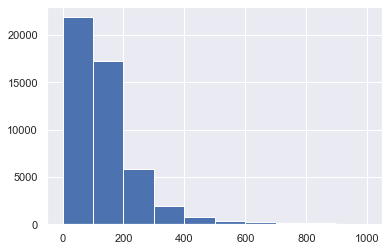

In [1125]:
hist_price1000=raw_data["price"][raw_data["price"]<1000].hist()
# Preisverteilung ist nicht normalverteilt, die Meisten Preise liegen unter 800 $, die höheren werden kann man später sicher als Outlier betrachten

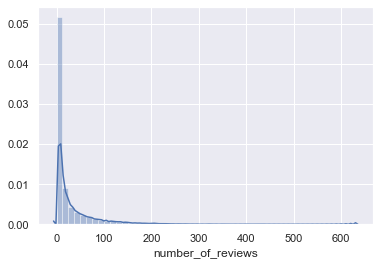

In [1202]:
sns.distplot(raw_data['number_of_reviews'])

In [1206]:
n = raw_data['number_of_reviews'].quantile(0.99)
n
# 99% der Werte liegen unter 214 Reviews

214.0

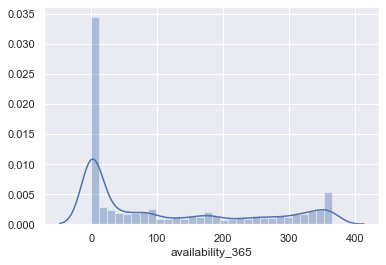

In [1203]:
sns.distplot(raw_data['availability_365'])

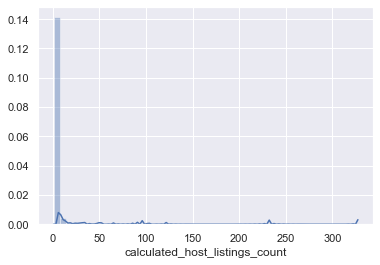

In [1204]:
sns.distplot(raw_data['calculated_host_listings_count'])

In [1207]:
h = raw_data['calculated_host_listings_count'].quantile(0.99)
h

232.0

In [1126]:
raw_data['neighbourhood'].value_counts()
# Es gibt eine hohe Anzahl (221) unterschiedlicher Wohnviertel, viele dieser tauchen im Datensatz nur ein Mal auf und sich für die spätere Modellbildung nicht relevant

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Rossville                1
Fort Wadsworth           1
New Dorp                 1
Richmondtown             1
Woodrow                  1
Name: neighbourhood, Length: 221, dtype: int64

In [1127]:
raw_data[['neighbourhood', 'price']].groupby(['neighbourhood'], as_index=False).mean().sort_values(by='price', ascending=False)
# Die teuersten Viertel sind Fort Wadsworth und Woodrow

,neighbourhood,price
82,Fort Wadsworth,800.000000
219,Woodrow,700.000000
197,Tribeca,490.638418
174,Sea Gate,487.857143
167,Riverdale,442.090909
...,...,...
141,New Dorp,57.000000
179,Soundview,53.466667
196,Tremont,51.545455
102,Hunts Point,50.500000


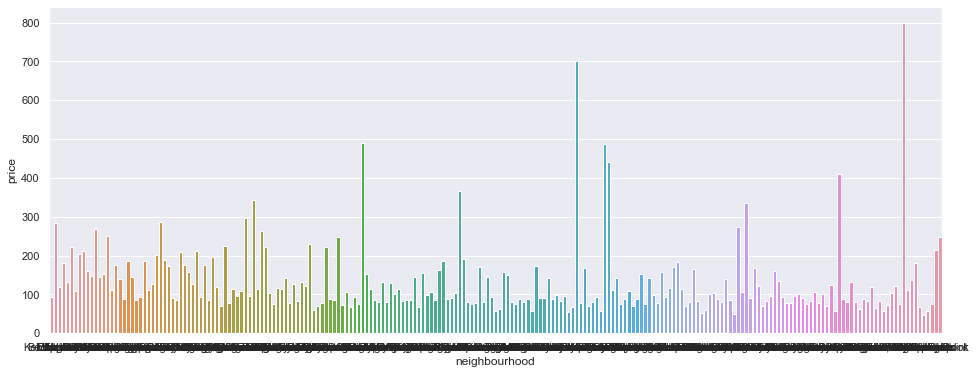

In [1128]:
plt.figure(figsize=(16, 6))
sns.barplot(raw_data.neighbourhood,raw_data.price,ci=None)
# Hier sieht man sehr gut, dass es einige Ausreißer gibt, die es später zu entfernen gilt

In [1129]:
dfnh = raw_data.groupby("neighbourhood").filter(lambda x: x['neighbourhood'].count() > 10)
len(dfnh["neighbourhood"])
# Es würden immernoch 48.583 (>99%) Datenpunke bleiben, wenn man alle Zeilen mit Viertel, die weniger als 10 Mal genannt werden entfernt

48583

In [1130]:
dfnh['neighbourhood'].value_counts()
# Die Anzahl der Viertel hat sich auf 162 reduziert, was unser späteres Modell deutlich vereinfachen wird

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Woodlawn                11
Whitestone              11
Van Nest                11
Riverdale               11
Edgemere                11
Name: neighbourhood, Length: 162, dtype: int64

In [1131]:
raw_data['neighbourhood_group'].value_counts()
# Es gibt nur 5 Stadtteile in New York

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [1132]:
raw_data[['neighbourhood_group', 'price']].groupby(['neighbourhood_group'], as_index=False).mean().sort_values(by='price', ascending=False)
# Das teuerste Stadtteil ist Manhattan, das günstigste die Bronx

,neighbourhood_group,price
2,Manhattan,196.875814
1,Brooklyn,124.383207
4,Staten Island,114.812332
3,Queens,99.517649
0,Bronx,87.496792


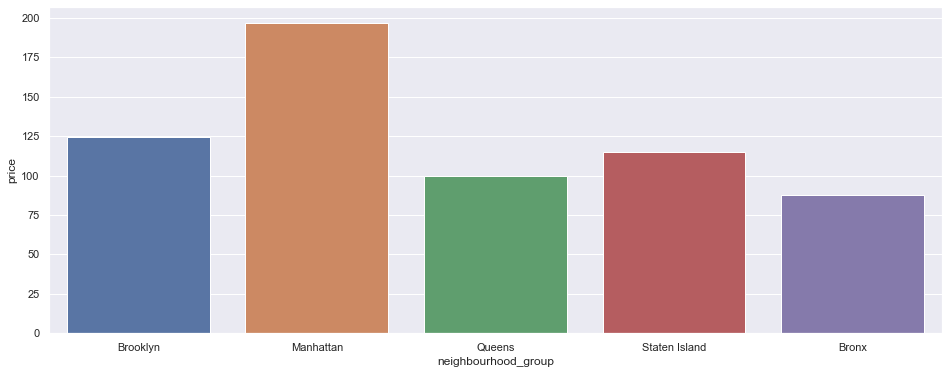

In [1133]:
plt.figure(figsize=(16, 6))
sns.barplot(raw_data.neighbourhood_group,raw_data.price,ci=None)
# Nochmals als Barplot dargestellt

In [1134]:
raw_data['room_type'].value_counts()
# Es gibt drei Zimmertypen

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [1135]:
raw_data[['room_type', 'price']].groupby(['room_type'], as_index=False).mean().sort_values(by='price', ascending=False)
# Am teuersten ist dabei ein komplettes Appartment

,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


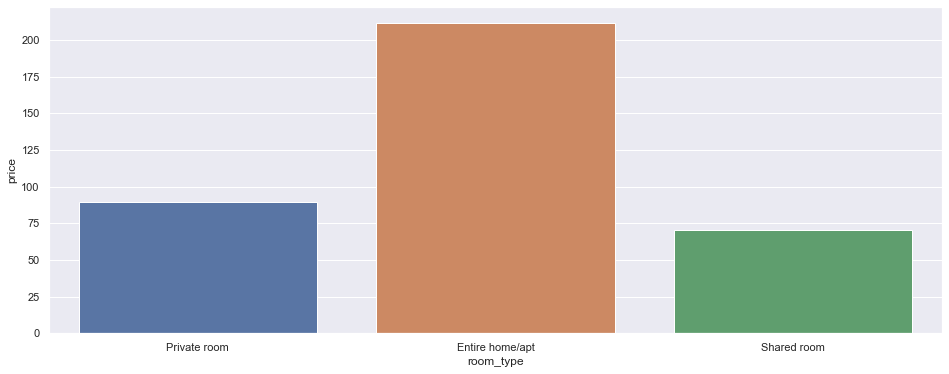

In [1136]:
plt.figure(figsize=(16, 6))
sns.barplot(raw_data.room_type,raw_data.price,ci=None)

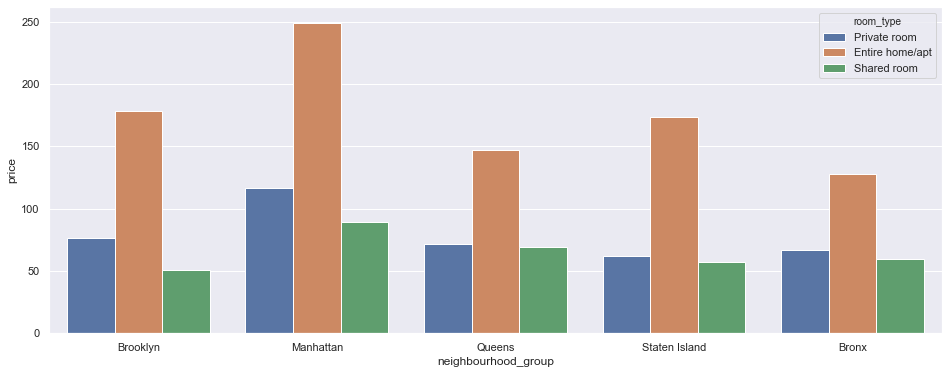

In [1137]:
plt.figure(figsize=(16, 6))
sns.barplot(raw_data.neighbourhood_group,raw_data.price,hue=raw_data.room_type,ci=None)
# Hier sehen wir die Kombination aus Stadtteil und Zimmertyp, das Verhältnis ist dabei in allen Vierteln ähnlich und Manhattan immer am teuersten

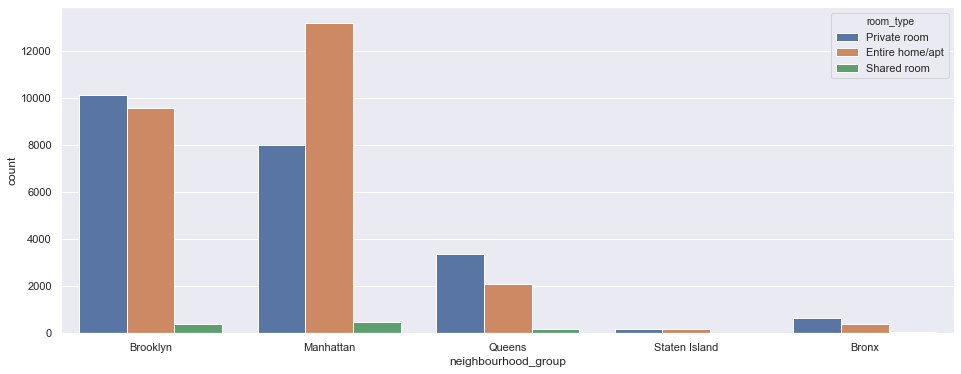

In [1138]:
plt.figure(figsize=(16, 6))
sns.countplot(raw_data.neighbourhood_group,hue=raw_data.room_type)
# Die meisten Inserate findet man in Brooklyn und Manhattan. Staten Island taucht dabei kaum auf im Vergleich

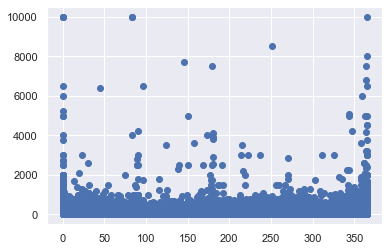

In [1139]:
plt.scatter(raw_data['availability_365'], raw_data['price'])
# Wenn man die Verfügbarkeit und Preis gegenüberstellt, kann man leider keinen Trend in den Daten sehen - diese Spalte kann also später entfernt werden

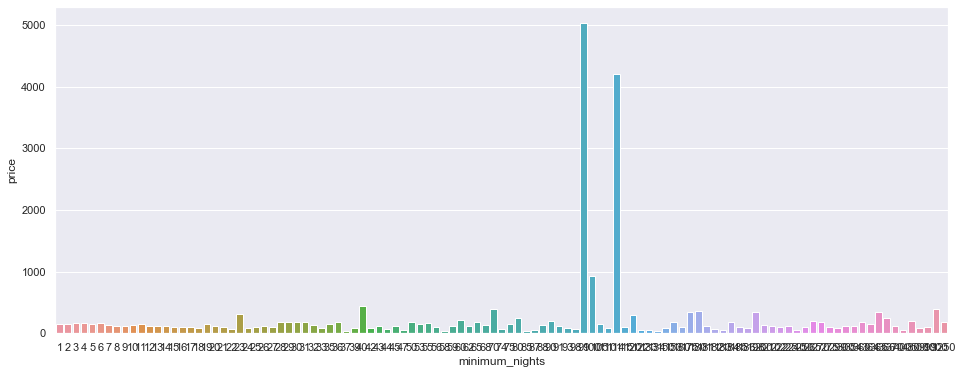

In [1140]:
plt.figure(figsize=(16, 6))
sns.barplot(raw_data.minimum_nights,raw_data.price,ci=None)
# Bei der Mindestanzahl der Nächte gibt es preislich ein paar Ausreißer, die es später zu behandeln gilt

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

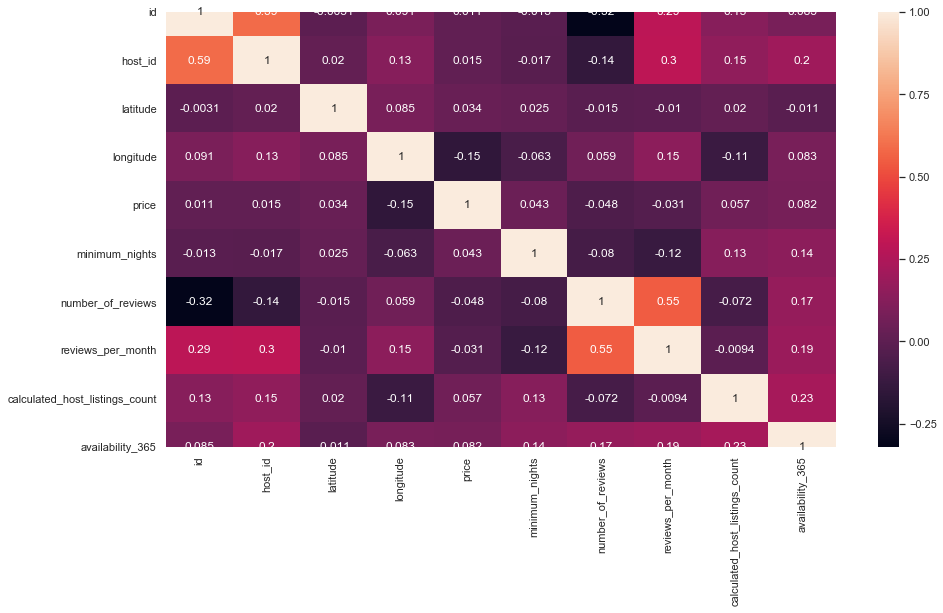

In [1141]:
corr = raw_data.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
raw_data.columns
# Die Korrelationsmatrix zeigt uns leider keine Werte >0,8, daher kann man keine weitere Spalten entfernen.

# Data Preparation

## Drop Variables

In [1142]:
# Remove name, host_name, last_review, reviews_per_month due to missing values
# Remove id and hist_id as those are only ids and have no importance for the model
# Remove longitude and latidude as we already have the location through neighbourhood
# Remove availability_365 as there is no trend in the data regarding the price

data = raw_data.drop(['name','id','host_id','host_name','latitude','longitude','last_review','reviews_per_month', 'availability_365'],axis=1)

In [1143]:
# Delete data with Neighbourhood entries < 10
data_0 = data.groupby("neighbourhood").filter(lambda x: x['neighbourhood'].count() > 10)

In [1144]:
data_0.describe(include='all')

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
count,48583,48583,48583,48583.000000,48583.00000,48583.000000,48583.000000
unique,5,162,3,NaN,NaN,NaN,NaN
top,Manhattan,Williamsburg,Entire home/apt,NaN,NaN,NaN,NaN
freq,21661,3920,25248,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,152.919602,7.03740,23.284173,7.178972
std,NaN,NaN,NaN,240.594591,20.48486,44.600748,33.055073
min,NaN,NaN,NaN,0.000000,1.00000,0.000000,1.000000
25%,NaN,NaN,NaN,69.000000,1.00000,1.000000,1.000000
50%,NaN,NaN,NaN,107.000000,3.00000,5.000000,1.000000
75%,NaN,NaN,NaN,175.000000,5.00000,24.000000,2.000000


### Missing Values

In [1145]:
data_0.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
dtype: int64

### Exploring the price function

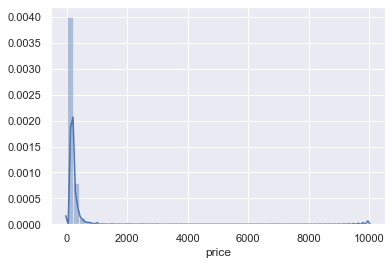

In [1146]:
sns.distplot(data_0['price'])

### Dealing with Outliers

In [1147]:
# Outlier = Not a problem to delete 1% of data. Here we have a high number of outliers and need to delete 5% of the data to have a realistic price
q = data_0['price'].quantile(0.95)
q

357.8000000000029

In [1148]:
data_p=data_0[data_0['price']>1]
# Keep pnly price data which is >1$ per night

In [1149]:
data_1=data_p[data_p['price']<q]
# Delete the outliers > 800 $ per night

In [1150]:
data_1.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,Brooklyn,Kensington,Private room,149,1,9,6
1,Manhattan,Midtown,Entire home/apt,225,1,45,2
2,Manhattan,Harlem,Private room,150,3,0,1
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1
4,Manhattan,East Harlem,Entire home/apt,80,10,9,1


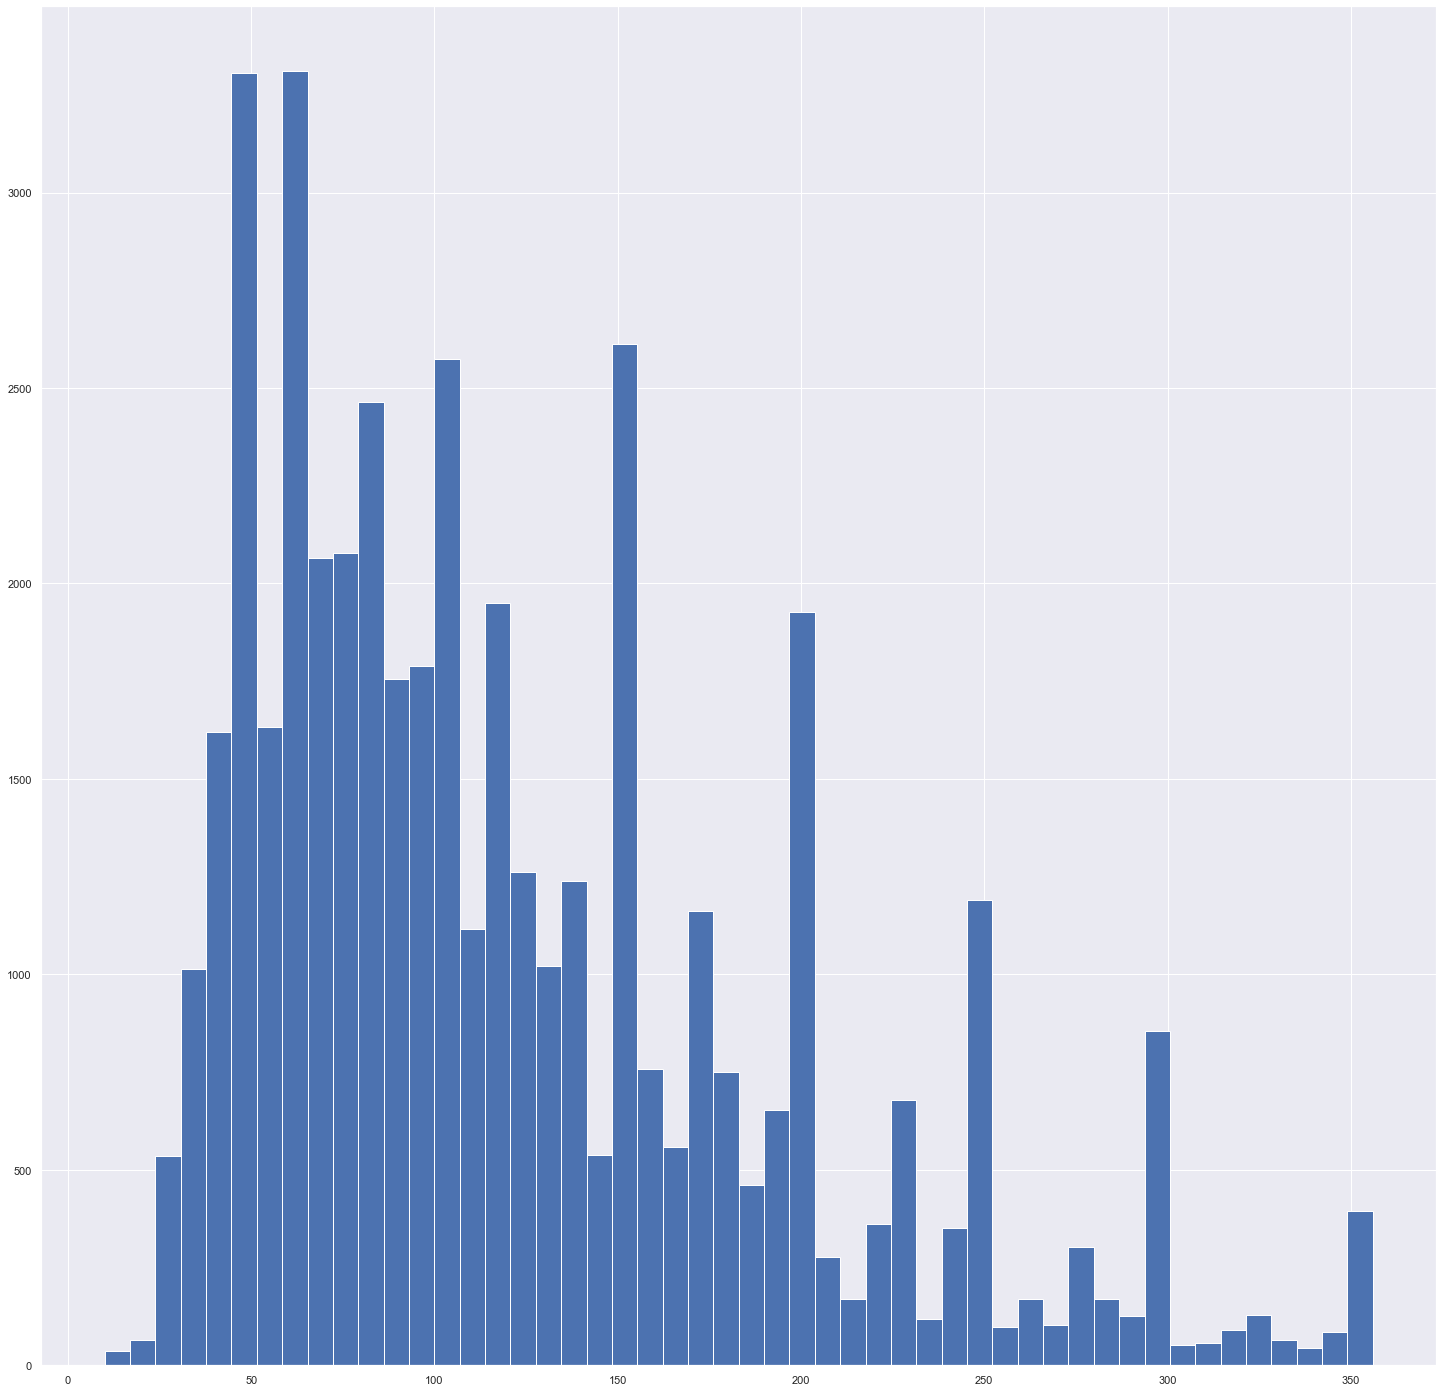

In [1151]:
hist_mn1=data_1["price"].hist(figsize=(25,25), bins=50)
hist_mn1

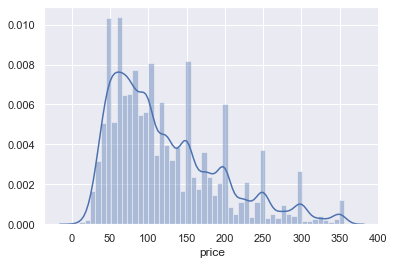

In [1199]:
sns.distplot(data_1['price'])

In [1208]:
n = data_1['number_of_reviews'].quantile(0.99)
n

216.0

In [1210]:
data_1=data_1[data_1['number_of_reviews']<n]
# Delete the outliers > 216 reviews per listning

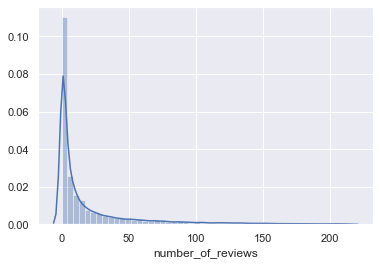

In [1258]:
sns.distplot(data_1['number_of_reviews'])

In [1211]:
data_1.describe(include='all')
# We still have 45.673 entries

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
count,45673,45673,45673,45673.000000,45673.000000,45673.000000,45673.000000
unique,5,162,3,NaN,NaN,NaN,NaN
top,Manhattan,Williamsburg,Entire home/apt,NaN,NaN,NaN,NaN
freq,19691,3730,22910,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,122.883651,5.974296,21.169356,6.776980
std,NaN,NaN,NaN,72.114469,8.679086,36.311760,31.421661
min,NaN,NaN,NaN,10.000000,1.000000,0.000000,1.000000
25%,NaN,NaN,NaN,66.000000,1.000000,1.000000,1.000000
50%,NaN,NaN,NaN,100.000000,3.000000,5.000000,1.000000
75%,NaN,NaN,NaN,160.000000,5.000000,23.000000,2.000000


### Dealing with Wrong Values

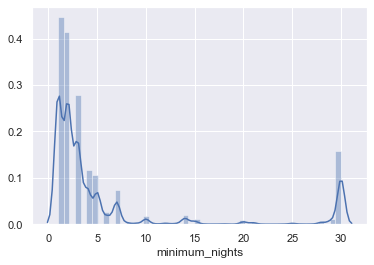

In [1212]:
sns.distplot(data_1['minimum_nights'])

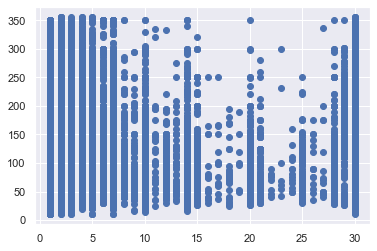

In [1213]:
plt.scatter(data_1['minimum_nights'], data_1['price'])

In [1214]:
# Outlier = Not a problem to delete 1% of data
z = data_1['minimum_nights'].quantile(0.98)
z

30.0

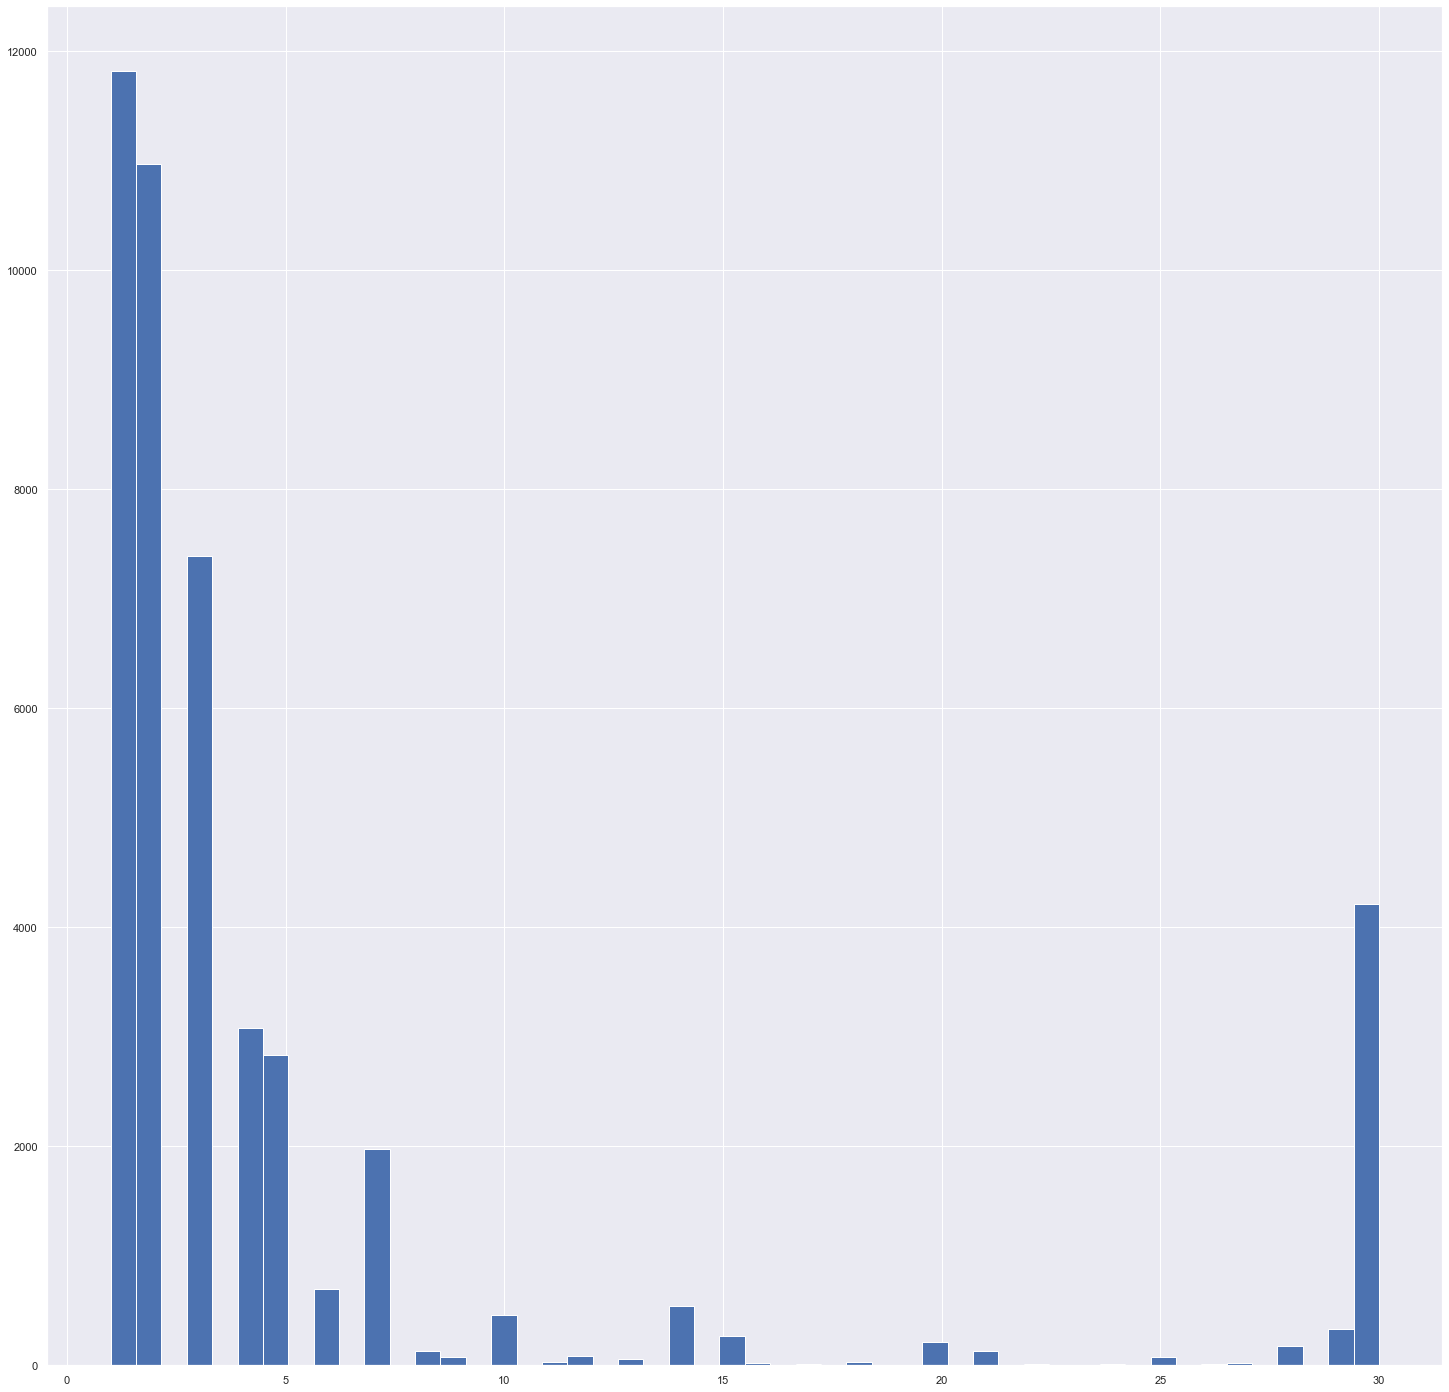

In [1215]:
hist_mn1=data_1["minimum_nights"][data_1["minimum_nights"]<40].hist(figsize=(25,25), bins=50)
hist_mn1
# We see that we have two distributions here:
# First one for short term booking for around 3-5 days
# Second one for long term booking for around 30 days
# We need to focus on only one distribution to create a fitting model, so we keep the first one and delete everything < 30 days

In [1216]:
### We delete all records > z
#data_1=data_1[data_1['minimum_nights']<25]

In [1217]:
### We replace all records with min nights > 30 by 30
data_1.loc[(data_1.minimum_nights >30),"minimum_nights"]=30

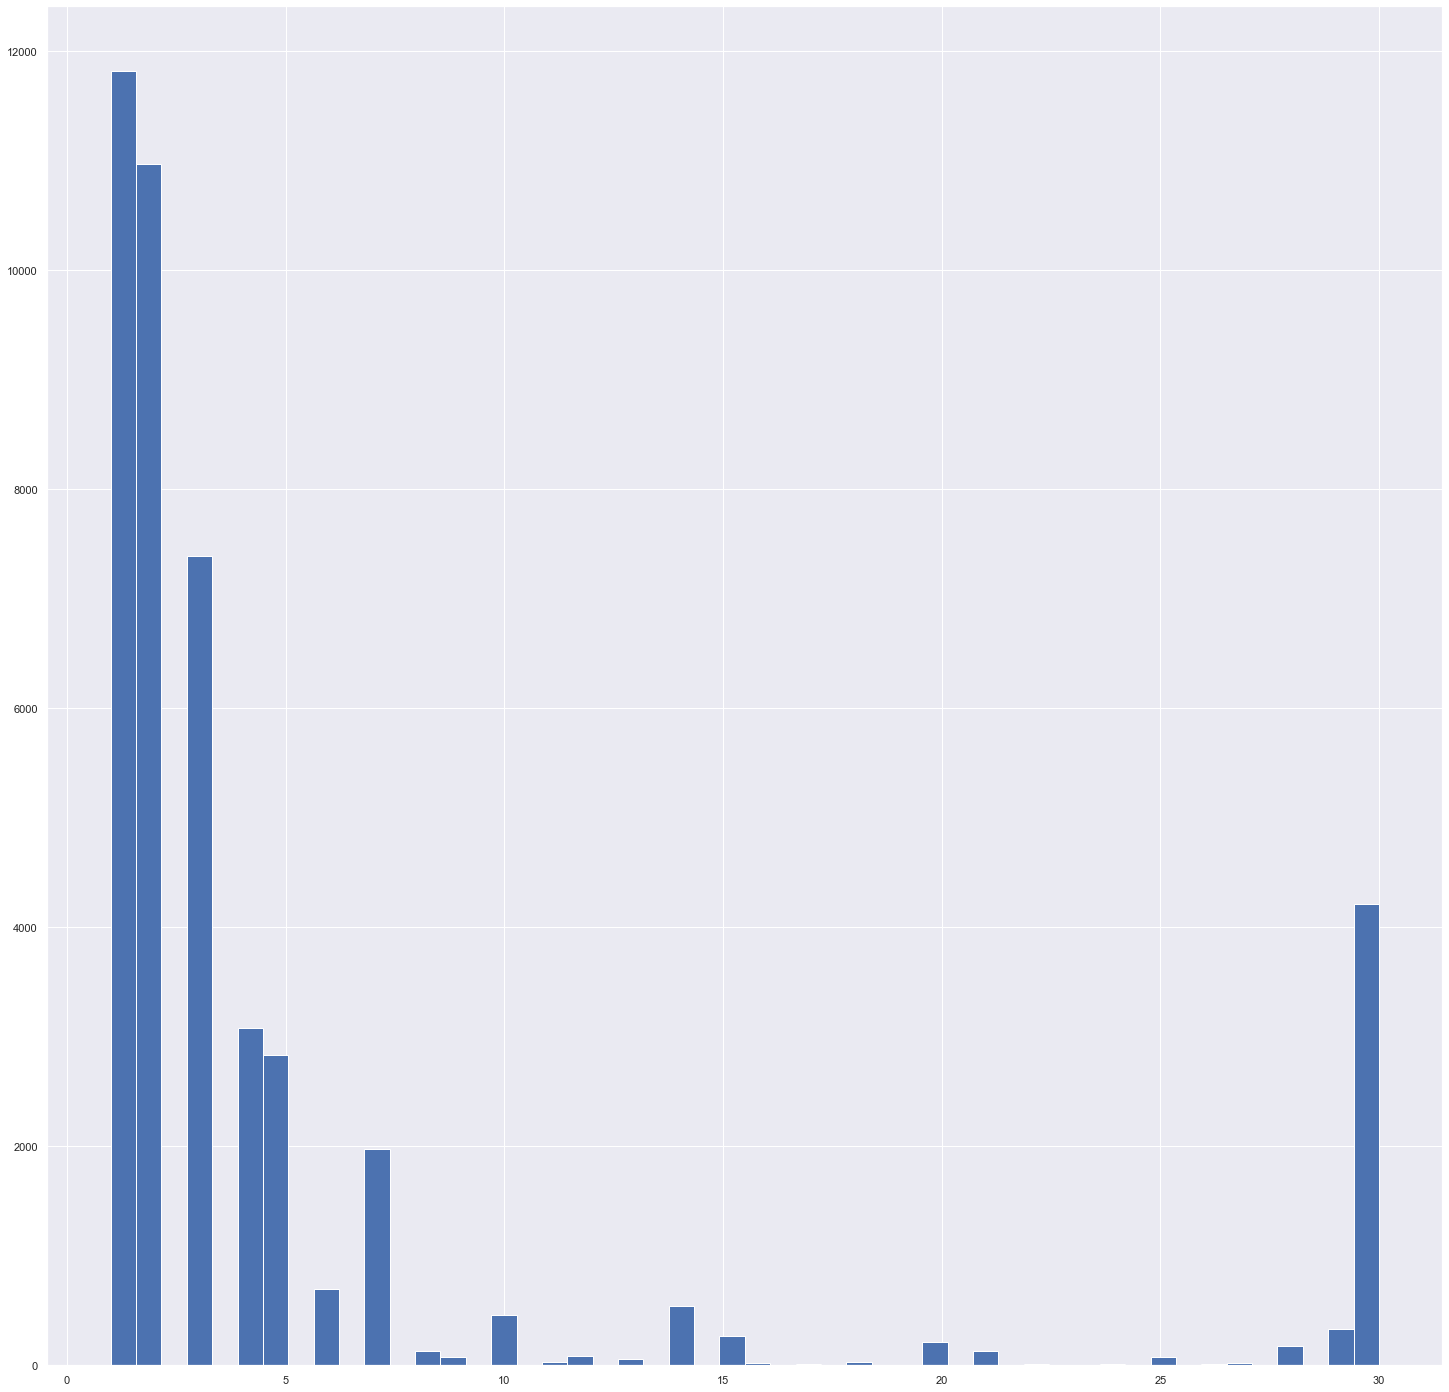

In [1218]:
hist_mn2=data_1["minimum_nights"][data_1["minimum_nights"]<40].hist(figsize=(25,25), bins=50)
hist_mn2

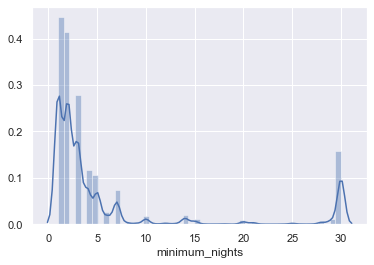

In [1219]:
sns.distplot(data_1['minimum_nights'])

In [1220]:
data_2 = data_1

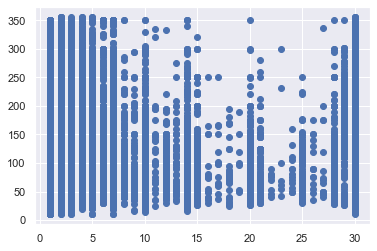

In [1221]:
plt.scatter(data_2['minimum_nights'], data_2['price'])

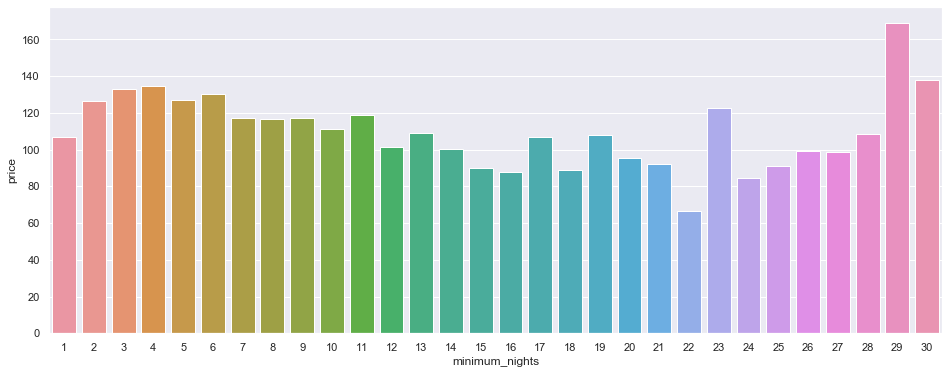

In [1222]:
# Finally we just check the descriptive statistics again after the high amount of data preparation tasks
plt.figure(figsize=(16, 6))
sns.barplot(data_2.minimum_nights,data_2.price,ci=None)

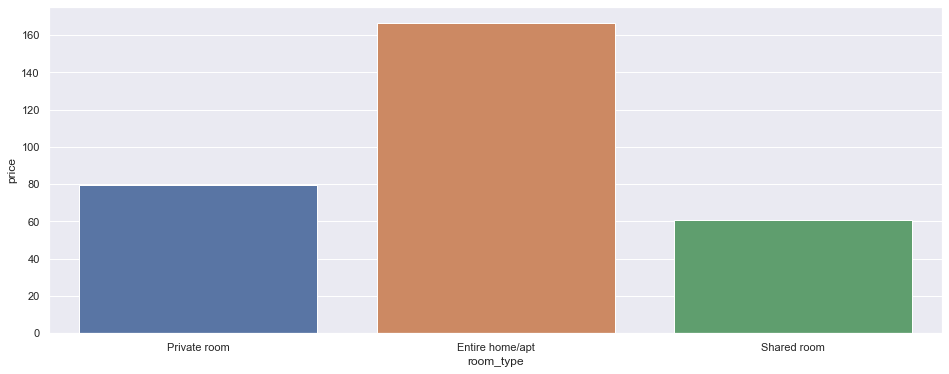

In [1223]:
plt.figure(figsize=(16, 6))
sns.barplot(data_2.room_type,data_2.price,ci=None)

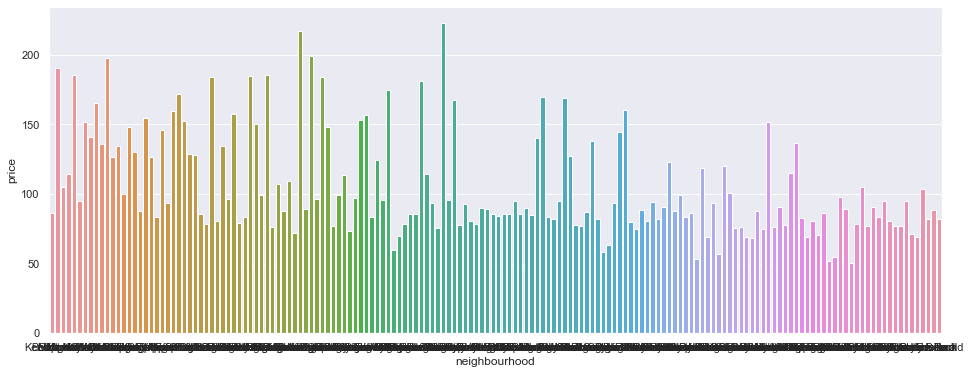

In [1224]:
plt.figure(figsize=(16, 6))
sns.barplot(data_2.neighbourhood,data_2.price,ci=None)

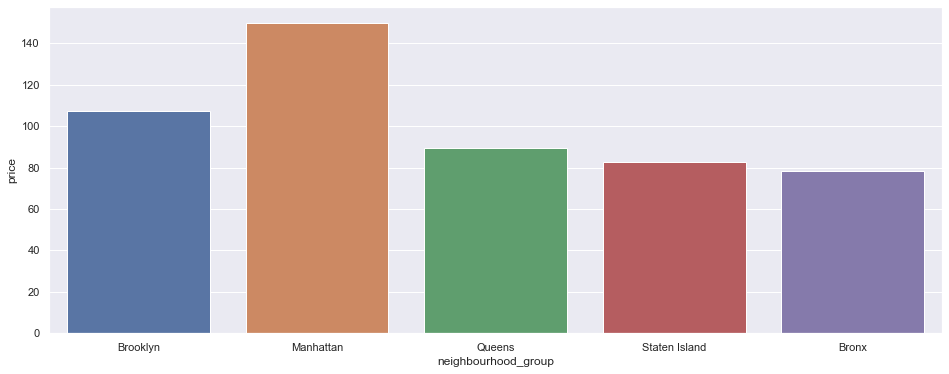

In [1225]:
plt.figure(figsize=(16, 6))
sns.barplot(data_2.neighbourhood_group,data_2.price,ci=None)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count
price,1.000000,0.063244,-0.027866,0.168741
minimum_nights,0.063244,1.000000,-0.160070,0.319193
number_of_reviews,-0.027866,-0.160070,1.000000,-0.078322
calculated_host_listings_count,0.168741,0.319193,-0.078322,1.000000


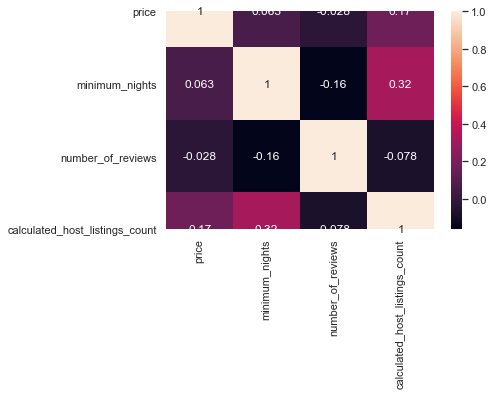

In [1226]:
corr = data_2.corr(method='pearson')
plt.figure()
sns.heatmap(corr, annot=True)
data_2.columns
corr
# Die Korrelationsmatrix zeigt uns leider keine Werte >0,8, daher kann man keine weitere Spalten entfernen.

# Other issues in Data Preparation

### Categorial Variables, Data Transformation, Data Standardization, Multicollinearity

### Finalize Data Preparation and Reset Index

In [1227]:
data_clean = data_2.reset_index(drop=True)

In [1228]:
data_clean.describe(include='all')

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
count,45673,45673,45673,45673.000000,45673.000000,45673.000000,45673.000000
unique,5,162,3,NaN,NaN,NaN,NaN
top,Manhattan,Williamsburg,Entire home/apt,NaN,NaN,NaN,NaN
freq,19691,3730,22910,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,122.883651,5.974296,21.169356,6.776980
std,NaN,NaN,NaN,72.114469,8.679086,36.311760,31.421661
min,NaN,NaN,NaN,10.000000,1.000000,0.000000,1.000000
25%,NaN,NaN,NaN,66.000000,1.000000,1.000000,1.000000
50%,NaN,NaN,NaN,100.000000,3.000000,5.000000,1.000000
75%,NaN,NaN,NaN,160.000000,5.000000,23.000000,2.000000


## Checking OLS Assumptions

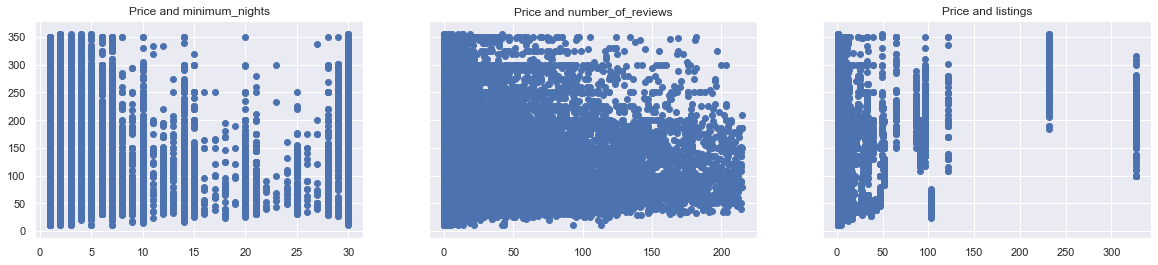

In [1229]:
# Model = Price as output, multiple features
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(20,4))

ax1.scatter(data_clean['minimum_nights'], data_clean['price'])
ax1.set_title('Price and minimum_nights')

ax2.scatter(data_clean['number_of_reviews'], data_clean['price'])
ax2.set_title('Price and number_of_reviews')

ax3.scatter(data_clean['calculated_host_listings_count'], data_clean['price'])
ax3.set_title('Price and listings')

plt.show()

# Evaluation Scatter = No Exponential Relationship between Output and Input

### Checking Multicollinearity

In [1230]:
data_clean.columns.values

array(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count'], dtype=object)

In [1231]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_clean[['minimum_nights','number_of_reviews','calculated_host_listings_count']]
vif = pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"]=variables.columns

In [1232]:
vif
# All < 2, so we can keep all values

,VIF,Features
0,1.199552,minimum_nights
1,1.031115,number_of_reviews
2,1.166071,calculated_host_listings_count


## Creating Dummy Variables for categorial variables

In [1233]:
data_clean.to_csv('airbnb_modified_clean_2.csv')

In [1234]:
data_with_dummies = pd.get_dummies(data_clean, drop_first=True)

In [1235]:
data_with_dummies.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Arrochar,neighbourhood_Arverne,...,neighbourhood_West Village,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
0,149,1,9,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,225,1,45,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,150,3,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,80,10,9,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,200,3,74,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1259]:
data_with_dummies.columns.values

array(['price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'neighbourhood_Arrochar',
       'neighbourhood_Arverne', 'neighbourhood_Astoria',
       'neighbourhood_Bath Beach', 'neighbourhood_Battery Park City',
       'neighbourhood_Bay Ridge', 'neighbourhood_Bayside',
       'neighbourhood_Bayswater', 'neighbourhood_Bedford-Stuyvesant',
       'neighbourhood_Bellerose', 'neighbourhood_Belmont',
       'neighbourhood_Bensonhurst', 'neighbourhood_Boerum Hill',
       'neighbourhood_Borough Park', 'neighbourhood_Briarwood',
       'neighbourhood_Brighton Beach', 'neighbourhood_Bronxdale',
       'neighbourhood_Brooklyn Heights', 'neighbourhood_Brownsville',
       'neighbourhood_Bushwick', 'neighbourhood_Cambria Heights',
       'neighbourhood_Canarsie', 'neighbourhood_Carroll Gardens',
       'neighbourhoo

In [1260]:
cols = ['price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'neighbourhood_Arrochar',
       'neighbourhood_Arverne', 'neighbourhood_Astoria',
       'neighbourhood_Bath Beach', 'neighbourhood_Battery Park City',
       'neighbourhood_Bay Ridge', 'neighbourhood_Bayside',
       'neighbourhood_Bayswater', 'neighbourhood_Bedford-Stuyvesant',
       'neighbourhood_Bellerose', 'neighbourhood_Belmont',
       'neighbourhood_Bensonhurst', 'neighbourhood_Boerum Hill',
       'neighbourhood_Borough Park', 'neighbourhood_Briarwood',
       'neighbourhood_Brighton Beach', 'neighbourhood_Bronxdale',
       'neighbourhood_Brooklyn Heights', 'neighbourhood_Brownsville',
       'neighbourhood_Bushwick', 'neighbourhood_Cambria Heights',
       'neighbourhood_Canarsie', 'neighbourhood_Carroll Gardens',
       'neighbourhood_Chelsea', 'neighbourhood_Chinatown',
       'neighbourhood_City Island', 'neighbourhood_Civic Center',
       'neighbourhood_Claremont Village', 'neighbourhood_Clason Point',
       'neighbourhood_Clifton', 'neighbourhood_Clinton Hill',
       'neighbourhood_Cobble Hill', 'neighbourhood_College Point',
       'neighbourhood_Columbia St', 'neighbourhood_Concord',
       'neighbourhood_Concourse', 'neighbourhood_Concourse Village',
       'neighbourhood_Coney Island', 'neighbourhood_Corona',
       'neighbourhood_Crown Heights', 'neighbourhood_Cypress Hills',
       'neighbourhood_DUMBO', 'neighbourhood_Ditmars Steinway',
       'neighbourhood_Downtown Brooklyn', 'neighbourhood_Dyker Heights',
       'neighbourhood_East Elmhurst', 'neighbourhood_East Flatbush',
       'neighbourhood_East Harlem', 'neighbourhood_East New York',
       'neighbourhood_East Village', 'neighbourhood_Eastchester',
       'neighbourhood_Edenwald', 'neighbourhood_Edgemere',
       'neighbourhood_Elmhurst', 'neighbourhood_Far Rockaway',
       'neighbourhood_Fieldston', 'neighbourhood_Financial District',
       'neighbourhood_Flatbush', 'neighbourhood_Flatiron District',
       'neighbourhood_Flatlands', 'neighbourhood_Flushing',
       'neighbourhood_Fordham', 'neighbourhood_Forest Hills',
       'neighbourhood_Fort Greene', 'neighbourhood_Fort Hamilton',
       'neighbourhood_Fresh Meadows', 'neighbourhood_Glendale',
       'neighbourhood_Gowanus', 'neighbourhood_Gramercy',
       'neighbourhood_Gravesend', 'neighbourhood_Greenpoint',
       'neighbourhood_Greenwich Village', 'neighbourhood_Harlem',
       "neighbourhood_Hell's Kitchen", 'neighbourhood_Highbridge',
       'neighbourhood_Hollis', 'neighbourhood_Howard Beach',
       'neighbourhood_Hunts Point', 'neighbourhood_Inwood',
       'neighbourhood_Jackson Heights', 'neighbourhood_Jamaica',
       'neighbourhood_Jamaica Estates', 'neighbourhood_Kensington',
       'neighbourhood_Kew Gardens', 'neighbourhood_Kew Gardens Hills',
       'neighbourhood_Kingsbridge', 'neighbourhood_Kips Bay',
       'neighbourhood_Laurelton', 'neighbourhood_Little Italy',
       'neighbourhood_Long Island City', 'neighbourhood_Longwood',
       'neighbourhood_Lower East Side', 'neighbourhood_Marble Hill',
       'neighbourhood_Maspeth', 'neighbourhood_Middle Village',
       'neighbourhood_Midtown', 'neighbourhood_Midwood',
       'neighbourhood_Morningside Heights',
       'neighbourhood_Morris Heights', 'neighbourhood_Morris Park',
       'neighbourhood_Morrisania', 'neighbourhood_Mott Haven',
       'neighbourhood_Mount Hope', 'neighbourhood_Murray Hill',
       'neighbourhood_Navy Yard', 'neighbourhood_NoHo',
       'neighbourhood_Nolita', 'neighbourhood_Norwood',
       'neighbourhood_Ozone Park', 'neighbourhood_Park Slope',
       'neighbourhood_Parkchester', 'neighbourhood_Pelham Bay',
       'neighbourhood_Pelham Gardens', 'neighbourhood_Port Morris',
       'neighbourhood_Prospect Heights',
       'neighbourhood_Prospect-Lefferts Gardens',
       'neighbourhood_Queens Village', 'neighbourhood_Randall Manor',
       'neighbourhood_Red Hook', 'neighbourhood_Rego Park',
       'neighbourhood_Richmond Hill', 'neighbourhood_Ridgewood',
       'neighbourhood_Riverdale', 'neighbourhood_Rockaway Beach',
       'neighbourhood_Roosevelt Island', 'neighbourhood_Rosedale',
       'neighbourhood_Schuylerville', 'neighbourhood_Sheepshead Bay',
       'neighbourhood_SoHo', 'neighbourhood_Soundview',
       'neighbourhood_South Ozone Park', 'neighbourhood_South Slope',
       'neighbourhood_Springfield Gardens', 'neighbourhood_St. Albans',
       'neighbourhood_St. George', 'neighbourhood_Stapleton',
       'neighbourhood_Stuyvesant Town', 'neighbourhood_Sunnyside',
       'neighbourhood_Sunset Park', 'neighbourhood_Theater District',
       'neighbourhood_Throgs Neck', 'neighbourhood_Tompkinsville',
       'neighbourhood_Tremont', 'neighbourhood_Tribeca',
       'neighbourhood_Two Bridges', 'neighbourhood_University Heights',
       'neighbourhood_Upper East Side', 'neighbourhood_Upper West Side',
       'neighbourhood_Van Nest', 'neighbourhood_Vinegar Hill',
       'neighbourhood_Wakefield', 'neighbourhood_Washington Heights',
       'neighbourhood_West Brighton', 'neighbourhood_West Village',
       'neighbourhood_Whitestone', 'neighbourhood_Williamsbridge',
       'neighbourhood_Williamsburg', 'neighbourhood_Windsor Terrace',
       'neighbourhood_Woodhaven', 'neighbourhood_Woodlawn',
       'neighbourhood_Woodside', 'room_type_Private room',
       'room_type_Shared room']

In [1261]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Arrochar,neighbourhood_Arverne,...,neighbourhood_West Village,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
0,149,1,9,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,225,1,45,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,150,3,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,80,10,9,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,200,3,74,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1263]:
data_preprocessed.describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Arrochar,neighbourhood_Arverne,...,neighbourhood_West Village,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
count,45673.000000,45673.000000,45673.000000,45673.000000,45673.000000,45673.00000,45673.000000,45673.000000,45673.000000,45673.000000,...,45673.000000,45673.000000,45673.000000,45673.000000,45673.000000,45673.000000,45673.000000,45673.000000,45673.000000,45673.000000
mean,122.883651,5.974296,21.169356,6.776980,0.423248,0.43113,0.119458,0.004576,0.000438,0.001598,...,0.014582,0.000219,0.000854,0.081668,0.003306,0.001861,0.000241,0.004948,0.473672,0.024719
std,72.114469,8.679086,36.311760,31.421661,0.494079,0.49524,0.324330,0.067492,0.020922,0.039947,...,0.119873,0.014795,0.029209,0.273860,0.057404,0.043100,0.015517,0.070170,0.499312,0.155270
min,10.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,3.000000,5.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,160.000000,5.000000,23.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,356.000000,30.000000,215.000000,327.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Linear Regression Model

### Define Inputs and Targets

In [1264]:
targets = data_preprocessed['price']
inputs = data_preprocessed.drop(['price'], axis=1)

### Feature Scaling = Standardization

In [1265]:
from sklearn.preprocessing import StandardScaler

In [1266]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [1267]:
inputs_scaled=scaler.transform(inputs)

In [1268]:
inputs_scaled

array([[-0.57314212, -0.33513906, -0.02472779, ..., -0.07051826,
         1.05411935, -0.15920341],
       [-0.57314212,  0.65628613, -0.15202991, ..., -0.07051826,
        -0.94865918, -0.15920341],
       [-0.3427006 , -0.58299536, -0.18385543, ..., -0.07051826,
         1.05411935, -0.15920341],
       ...,
       [ 0.46384473, -0.58299536, -0.18385543, ..., -0.07051826,
        -0.94865918, -0.15920341],
       [-0.57314212, -0.58299536, -0.02472779, ..., -0.07051826,
        -0.94865918,  6.28127252],
       [ 0.11818245, -0.58299536, -0.18385543, ..., -0.07051826,
         1.05411935, -0.15920341]])

### Train Test Split

In [1269]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create Regression on train data

In [1270]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1271]:
# y der Regressionsgerade bilden
y_hat = reg.predict(x_train)

Text(0, 0.5, 'Targets y_hat')

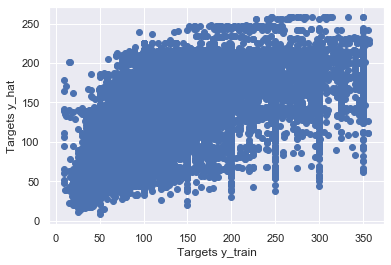

In [1272]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets y_train')
plt.ylabel('Targets y_hat')

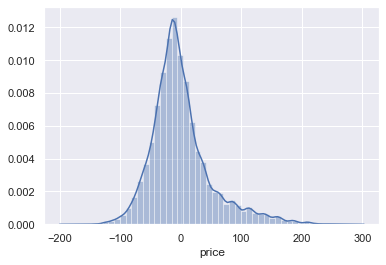

In [1273]:
sns.distplot(y_train - y_hat)

In [1274]:
# R squared
reg.score(x_train, y_train)

0.5064891569521783

### Create regression on test data

In [1275]:
y_hat2 = reg.predict(x_test)

Text(0, 0.5, 'Targets y_hat2')

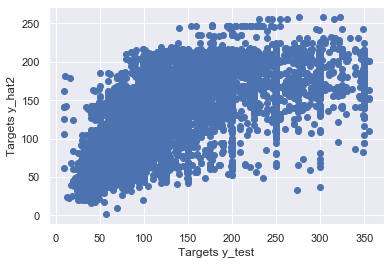

In [1276]:
plt.scatter(y_test, y_hat2)
plt.xlabel('Targets y_test')
plt.ylabel('Targets y_hat2')

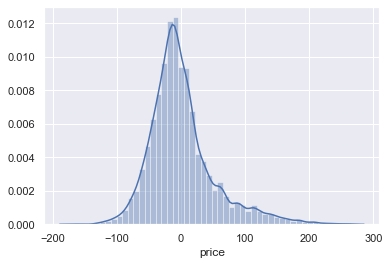

In [1277]:
sns.distplot(y_test - y_hat2)

In [1278]:
# Summary
print('training performance')
print(reg.score(x_train,y_train))
print('test performance')
print(reg.score(x_test,y_test))

training performance
0.5064891569521783
test performance
0.5051268053216521


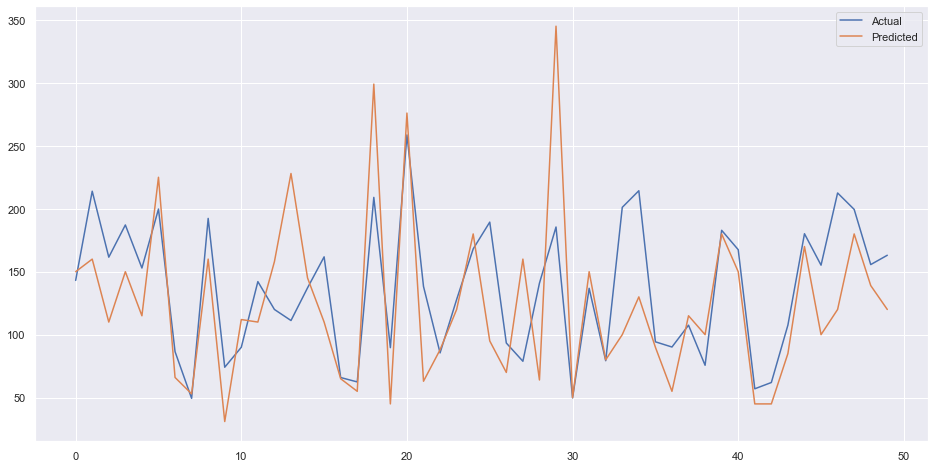

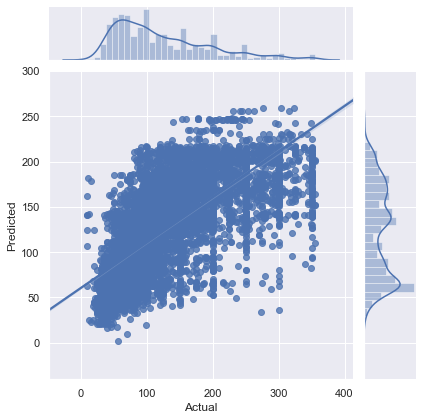

In [1279]:
y_pred = reg.predict(x_test)
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [1280]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,minimum_nights,-6.928589e+00
1,number_of_reviews,-1.529016e+00
2,calculated_host_listings_count,5.163507e+00
3,neighbourhood_group_Brooklyn,-1.247684e+13
4,neighbourhood_group_Manhattan,9.001991e+12
...,...,...
165,neighbourhood_Woodhaven,-1.155747e+12
166,neighbourhood_Woodlawn,-3.401489e-01
167,neighbourhood_Woodside,-1.881633e+12
168,room_type_Private room,-3.750000e+01


In [1282]:
reg_summary.to_csv('reg_summary_3.csv')